# Data Augmetation
---


In [1]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
sample_img_path

'/aiffel/aiffel/data_augmentation/images/mycat.jpg'

### Resizing

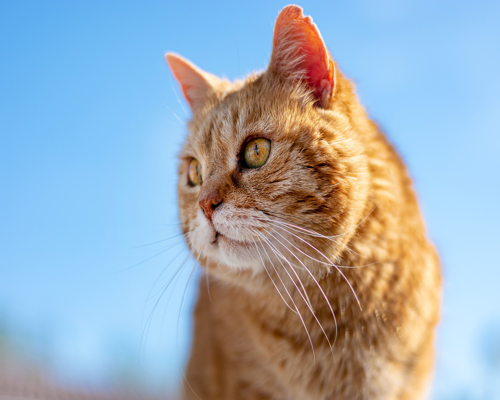

In [6]:
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

### Flip

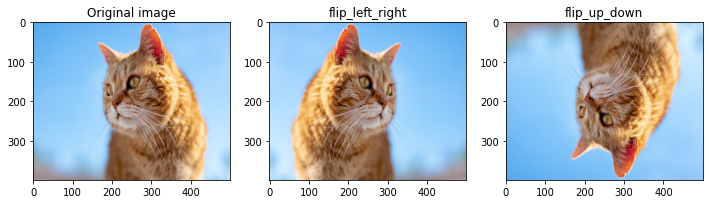

In [3]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(12, 12))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

plt.show()

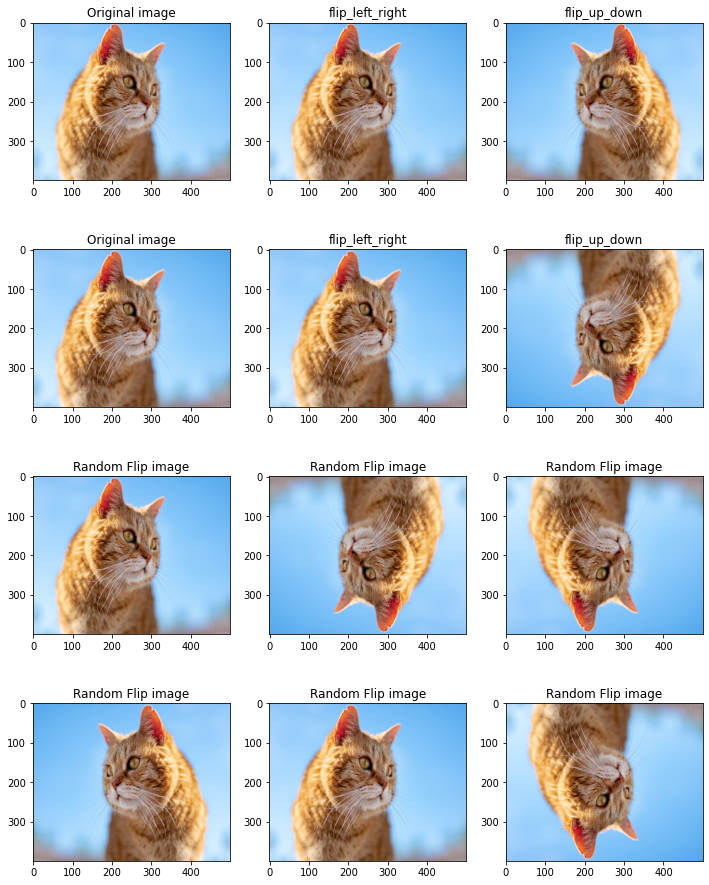

In [14]:
plt.figure(figsize=(12, 16))

row = 2
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)
    
def random_flip(image_tensor):
    temp = tf.image.random_flip_left_right(image_tensor)
    return tf.image.random_flip_up_down(temp)

for i in range(6):
    tensor = random_flip(image_tensor)
    image = tf.keras.preprocessing.image.array_to_img(tensor)
    plt.subplot(4,3,i+7)
    plt.title('Random Flip image')
    plt.imshow(image)

### Center Crop

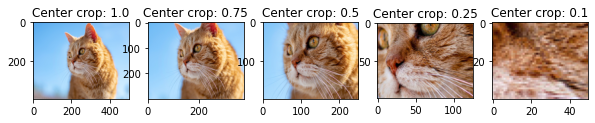

In [13]:
plt.figure(figsize=(12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

### Random Crop

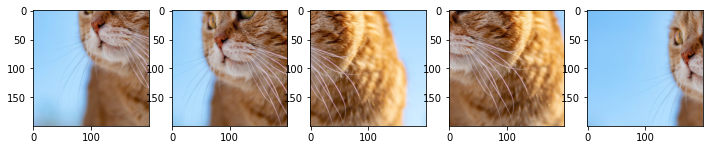

In [18]:
# apply random_crop on cat image 
plt.figure(figsize=(12, 15))

for i in range(5):
    random_crop_tensor = tf.image.random_crop(image_tensor, size=[200, 200, 3])
    random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
    plt.subplot(1,5,i+1)
    plt.imshow(random_crop_image)


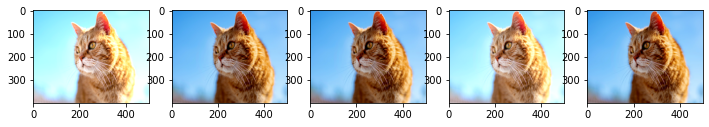

In [32]:
plt.figure(figsize=(12, 15))

for i in range(5):
    # 밝기 변화 delta값을 변경 예) max_delta=128
    random_bright_tensor = tf.image.random_brightness(image_tensor , max_delta=128)
    # random_brightness()를 통과한 텐서의 값들중 0~255를 벗어나는 값 clip
    cliped_random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255) 
    random_bright_image = tf.keras.preprocessing.image.array_to_img(cliped_random_bright_tensor)

    plt.subplot(1,5,i+1)
    plt.imshow(random_bright_image)

---
## albumentations 라이브러리
---
albumentations 라이브러리는 배열을 이미지의 기본 형태로 사용함

In [33]:
import numpy as np
image = Image.open(sample_img_path).resize((400, 300)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_arr = np.array(image)
image_arr.shape

(300, 400, 3)

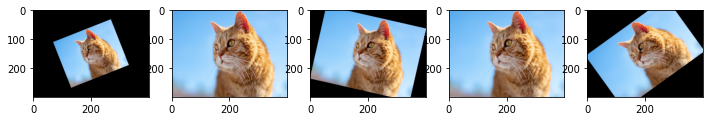

In [36]:
import albumentations as A

plt.figure(figsize=(12, 15))

for i in range(5):
    transform = A.Compose([
        A.Affine(rotate=(-45, 45),scale=(0.5,0.9),p=0.5) 
    ])
    transformed = transform(image=image_arr)
    
    plt.subplot(1,5,i+1)
    plt.imshow((transformed['image']))

### RandomCrop

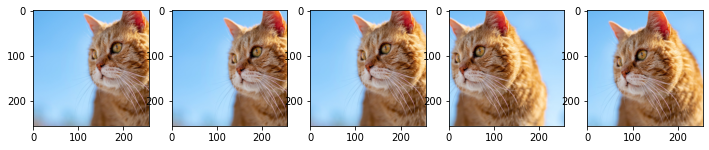

In [38]:
plt.figure(figsize=(12, 15))

for i in range(5):
    transform = A.Compose(
        [A.RandomCrop(width=256, height=256)]
    )
    transformed = transform(image=image_arr)
    
    plt.subplot(1,5,i+1)
    plt.imshow((transformed['image']))

### MedianBlur

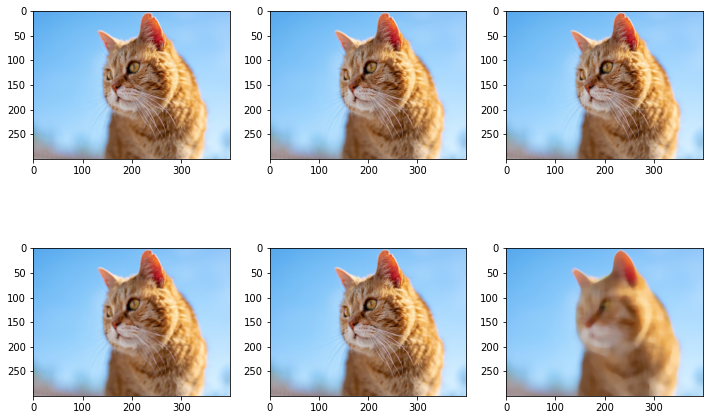

In [49]:
plt.figure(figsize=(12, 8))
for i in range(6):
    lim = (i*4) + 1
    transform = A.Compose(
        [A.MedianBlur(blur_limit=lim, always_apply=False, p=0.5)]
    )
    transformed = transform(image=image_arr)
    plt.subplot(2,3,i+1)
    plt.imshow((transformed['image']))

### ToGray()

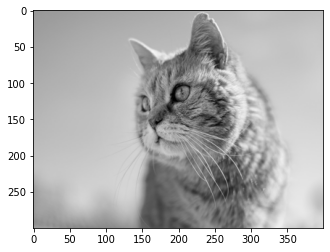

In [52]:
transform = A.Compose(
    [A.ToGray(p=1),]
#     A.MultiplicativeNoise(multiplier=[0.5, 1.5], elementwise=True, per_channel=True, p=1)]
)
transformed = transform(image=image_arr)
plt.imshow((transformed['image']))

### MultiplicativeNoise()

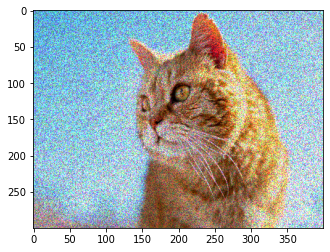

In [53]:
transform = A.Compose(
    [A.MultiplicativeNoise(multiplier=[0.5, 1.5], elementwise=True, per_channel=True, p=1)]
)
transformed = transform(image=image_arr)
plt.imshow((transformed['image']))